<a href="https://colab.research.google.com/github/Jaqueline-Silva3001/Modula-o01-07/blob/main/Segunda_Avalia%C3%A7%C3%A3o_Jaqueline_Silva_Santos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## QUESTÃO 1:

### A Programação Orientada a Equações (POE) é um paradigma que permite ao programador descrever um problema com foco em sua estrutura lógica, aproximando a modelagem computacional das equações matemáticas do processo físico.

(a) Explique como a POE difere da programação imperativa, considerando o papel do programador e o processo de obtenção da solução.

Na programação imperativa, o foco está em como resolver o problema, utilizando uma sequência de comando e variavéis que mudam ao longo do tempo. Esse paradigma é comum em sistemas gerais com manipulação de dados, onde o programador define o fluxo de execução. Já na POE, o foco está em o que deve ser resolvido. Ela envolve uma modelagem matemática do problema, com o uso de simulações e métodos de otimização. As relações entre as variáveis são estabelecidas por meio de um conjuntode equações declarativas, e a solução é obtida com base nessas restrições e metas.

(b) Em que tipo de problema de engenharia a POE é mais vantajosa? Cite pelo menos um exemplo prático — diferente dos discutidos em sala.

A POE é mais vantajosa na minimização dos custos de fabricação de equipamentos, como, por exemplo, colunas de destilação, permitindo analisar variáveis como a quantidade de pratos, a razão de refluxo e outros parâmetros de projeto. Também é utilizada na simulação de processos, auxiliando na avaliação da viabilidade técnica e econômica. Caso os resultados não sejam satisfatórios, é possível reavaliar e alterar a rota do processo.

(c) Um dos princípios mais valorizados da POE é a flexibilidade. O que esse princípio significa na prática? Por que ele é útil para o engenheiro químico?

A flexibilidade da POE significa que um mesmo código pode ser reutilizado com diferentes variáveis e condições, permitindo alterações em partes específicas ou facilitando sua utilização por outras pessoas. Essa flexibilidade é especialmente útil para o engenheiro químico, pois possibilita a modelagem natural de equações associadas a problemas típicos da engenharia, tais como, transferência de massa ou de calor, modelagem das conversões e propriedades das reações nos reatores ou dimensionamento do mesmo, e nos controle de processo.

## QUESTÃO 2:

#### Ao desenvolver soluções computacionais, a organização do código é essencial para sua manutenção, reusabilidade e adaptação a novos cenários.

(a) Explique o papel da estrutura @dataclass em Python na organização dos códigos. Por que ela é especialmente útil em sistemas com muitos parâmetros de entrada?

Quando existem funções com vários argumentos de entrada, o código pode se tornar pouco legivel, dificultando a reutilização e os teste. O dataclass surge como uma solução para agrupar essas variáveis relacionadas, melhorando a vizualização dessas propriedades, facilitando o reuso e evitando erros relacionados à ordem em que os argumentos são dispostos.

(b) Por que se recomenda salvar as soluções em repositórios como o GitHub? Cite três benefícios práticos, relacionando-os com a prática profissional ou acadêmica.

O salvamento no GitHub é altamente recomendado tanto no meio acadêmico quanto no profissional, pois permite o controle de versões, facilitando o acompanhamento de todas as modificações feitas no código ao longo do tempo. Isso contribui para a identificação de erros, possibilita a recuperação de versões anteriores e permite que várias pessoas trabalhem no mesmo projeto de forma mais organizada, com sugestões e comentários. Além disso, o uso do GitHub contribui para a construção de um portifólio profissional, já que esses projetos podem ser visualizados por recrutadores, professores ou orientados, demostrando suas habilidades técnicas e experiências práticas.

## QUESTÃO 3:

O valor final da concentração para T = 35.0 °C será S = 20.01 g/L


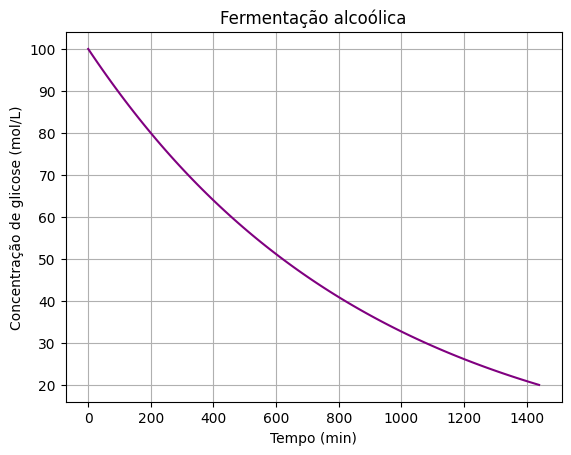

In [ ]:
# Importando as bibliotecas:
import numpy as np
from scipy.integrate import solve_ivp
from dataclasses import dataclass

# Configurando o dataclass:
@dataclass
class Param:
  T: float = 35.0 #Temperatura em (°C)

def ferm_alc(t, So, param):
  '''
  Calcula a taxa de consumo de glicose ao longo do tempo na fermentação alcoólica com dependência da temperatura
  '''
  k = 464.8*np.exp(-3985/(param.T+273))  # L/min
  dSdt = -k*So
  return dSdt

def simula_ferm(So, t, param):
  '''
    Simula a concentração de glicose ao longo do tempo
  '''
  t_eval = np.linspace(t[0], t[-1], 100) # Criando um vetor com a parcela de tempos
  sol = solve_ivp(ferm_alc, t, [So], args=(param,), t_eval=t_eval, method = 'BDF') # Chamando o solver para realizar o cálculo da EDO
  return sol.t, sol.y[0]


param = Param()

# Condições iniciais:
t = [0, 24*60]  # Faixa do tempo a ser analisado
So = 100.0 # Concentração inicial de glicose (g/L)

# Simulação 1 para temperatura de 35°C:
t, S = simula_ferm(So, t, param)

# Fazendo o gráfico:
print(f'O valor final da concentração para T = {param.T} °C será S = {S[-1]:.2f} g/L')
plt.plot(t, S, label = f'T = {param.T}', color = 'purple')
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração de glicose (mol/L)')
plt.title('Fermentação alcoólica')
plt.grid()
plt.show()




O valor final da concentração para T = 50.0 °C será S = 5.31 g/L
Como pode-se observar o valor da concentração incial de glicose diminui, então indica que houve um maior consumo da glicose quando se aumentou a temperatura.


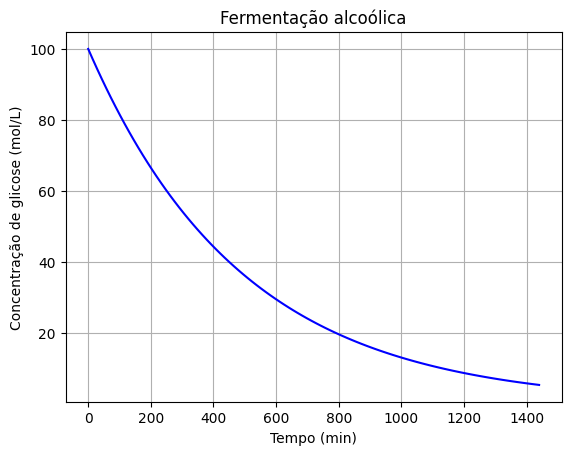

In [ ]:
# Simulação 2 para temperatura de 50°C:
param = Param(T = 50.0)

# Condições iniciais:
t = [0, 24*60]  # Faixa do tempo a ser analisado
So = 100.0 # Concentração inicial de glicose (g/L)


t2, S2 = simula_ferm(So, t, param)

# Fazendo o gráfico:
print(f'O valor final da concentração para T = {param.T} °C será S = {S2[-1]:.2f} g/L')
print(f'Como pode-se observar o valor da concentração incial de glicose diminui, então indica que houve um maior consumo da glicose quando se aumentou a temperatura.')
plt.plot(t2, S2, label = f'T = {param.T}', color = 'blue')
plt.xlabel('Tempo (min)')
plt.ylabel('Concentração de glicose (mol/L)')
plt.title('Fermentação alcoólica')
plt.grid()
plt.show()

## QUESTÃO 4:

In [ ]:
# Importando as bibliotecas:
from dataclasses import dataclass

# Configurando o dataclass:
@dataclass
class Parame:
  xi: float  # Fração molar líquida de etanol
  Ti: float  # Temperatura em (°C)
  i: int  # Estágio do processo

def coluna_eq(parame):
  '''
    Essa função calcula os valores da seletividade e a fração yi em cada estágio
  '''
  alfa = 2.5-(0.01*(parame.Ti-78)) # Equação para o valor de seletividade
  yi = (alfa*parame.xi)/(1+((alfa-1)*parame.xi)) # Fração de vapor no equilíbrio
  return yi, alfa



In [ ]:
# Criando um conjunto para vários valores de x, T:
conjunto = [Parame(xi = 0.20, Ti = 78, i = 1),
            Parame(xi = 0.40, Ti = 80, i = 2),
            Parame(xi = 0.60, Ti = 85, i = 3)]

# Chamando a função para resolver com o conjunto de parâmetros que foi dado.
for Parame in conjunto:
  yi, alfa = coluna_eq(Parame)
  print(f'No estágio {Parame.i}, y = {yi:.2f} e a seletividade = {alfa:.2f}')

No estágio 1, y = 0.38 e a seletividade = 2.50
No estágio 2, y = 0.62 e a seletividade = 2.48
No estágio 3, y = 0.78 e a seletividade = 2.43
